<a href="https://colab.research.google.com/github/daniela2109403/IA_IB_2024_2109403/blob/main/IA_FinalProject_2109403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IA Final Project.- Training a Machine Learning Model on Medical Images.**





Dataset: Brain MRI Images for Brain Tumor Detection

Author: Daniela Paola Rangel Aguilar 2109403 IB

Introduction: This project is based on training a convolutional neural network (CNN) to detect brain tumors using magnetic resonance images. The model is designed to classify images into two categories: "no" (no tumor) and "yes" (tumor present).

Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files
import zipfile

Load Data

The dataset is uploaded in ZIP format and extracted to a directory. Two categories, "no" and "yes", are defined to label the images.

In [4]:
print("Sube el archivo ZIP descargado de Kaggle.")
uploaded = files.upload()

zip_path = next(iter(uploaded))
extracted_path = "/content/brain_tumor_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

dataset_path = extracted_path
categories = ["no", "yes"]

Sube el archivo ZIP descargado de Kaggle.


Saving archive.zip to archive.zip


Data Preprocessing:

The images are loaded, converted to grayscale, resized to 128x128 pixels, normalized (pixel values scaled to 0-1), and labeled according to their category. The dataset is then split into:

Training set (80%): Used to train the model. Test set (20%): Used to evaluate the model's performance on unseen data.

In [5]:
data = []
labels = []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    class_label = categories.index(category)
    for img_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))
            data.append(image)
            labels.append(class_label)
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")

data = np.array(data)
labels = np.array(labels)

data = data / 255.0

data = np.expand_dims(data, axis=-1)

data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

train_gen = data_gen.flow(train_images, train_labels, batch_size=32)

CNN Structure

A simple neural network is created with:

Flatten layer: Converts the 2D image into a 1D array.
 Dense layers: Two fully connected layers, one with 128 neurons (ReLU activation) and another with 2 neurons (Softmax activation) for binary classification. The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss function.

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Trainingç

The model is trained for 10 epochs using the training set, with validation on the test set. Accuracy and validation metrics are calculated after each epoch.

In [8]:
history = model.fit(train_gen, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 947ms/step - accuracy: 0.5895 - loss: 0.7401 - val_accuracy: 0.6471 - val_loss: 0.6137
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6264 - loss: 0.6269 - val_accuracy: 0.7843 - val_loss: 0.5190
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 958ms/step - accuracy: 0.6811 - loss: 0.5826 - val_accuracy: 0.8039 - val_loss: 0.4903
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 925ms/step - accuracy: 0.6992 - loss: 0.6754 - val_accuracy: 0.7647 - val_loss: 0.5033
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7041 - loss: 0.5877 - val_accuracy: 0.8431 - val_loss: 0.4625
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7240 - loss: 0.5510 - val_accuracy: 0.7647 - val_loss: 0.5220
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 954ms/step - accuracy: 0.7272 - loss: 0.5551 - val_accuracy: 0.8235 - val_loss: 0.4247
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 864ms/step - accuracy: 0.7335 - loss: 0.5583 - val_accuracy: 0.8039 - val_loss: 0.4727
Epoch 9/

CNN Accuracy Results

The training and validation accuracy are visualized using a plot. The final test accuracy is computed and displayed to assess the model's performance.

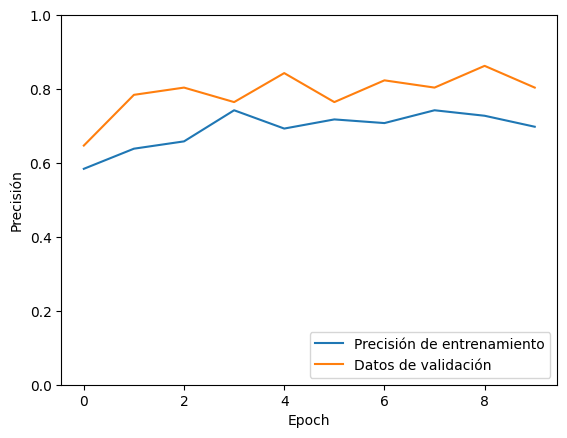

In [9]:
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Datos de validación')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Final Evaluation

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Precisión de la prueba: {test_acc}")

2/2 - 0s - 211ms/step - accuracy: 0.8039 - loss: 0.4768
Precisión de la prueba: 0.8039215803146362


Predictions with the trained CNN

In [11]:
predictions = model.predict(test_images)

for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = test_labels[i]
    print(f"Predicción: {categories[predicted_class]} | Clase verdadera: {categories[true_class]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step
Predicción: yes | Clase verdadera: yes
Predicción: no | Clase verdadera: no
Predicción: no | Clase verdadera: no
Predicción: yes | Clase verdadera: yes
Predicción: yes | Clase verdadera: yes
Predicción: yes | Clase verdadera: yes
Predicción: yes | Clase verdadera: yes
Predicción: yes | Clase verdadera: yes
Predicción: yes | Clase verdadera: no
Predicción: no | Clase verdadera: no


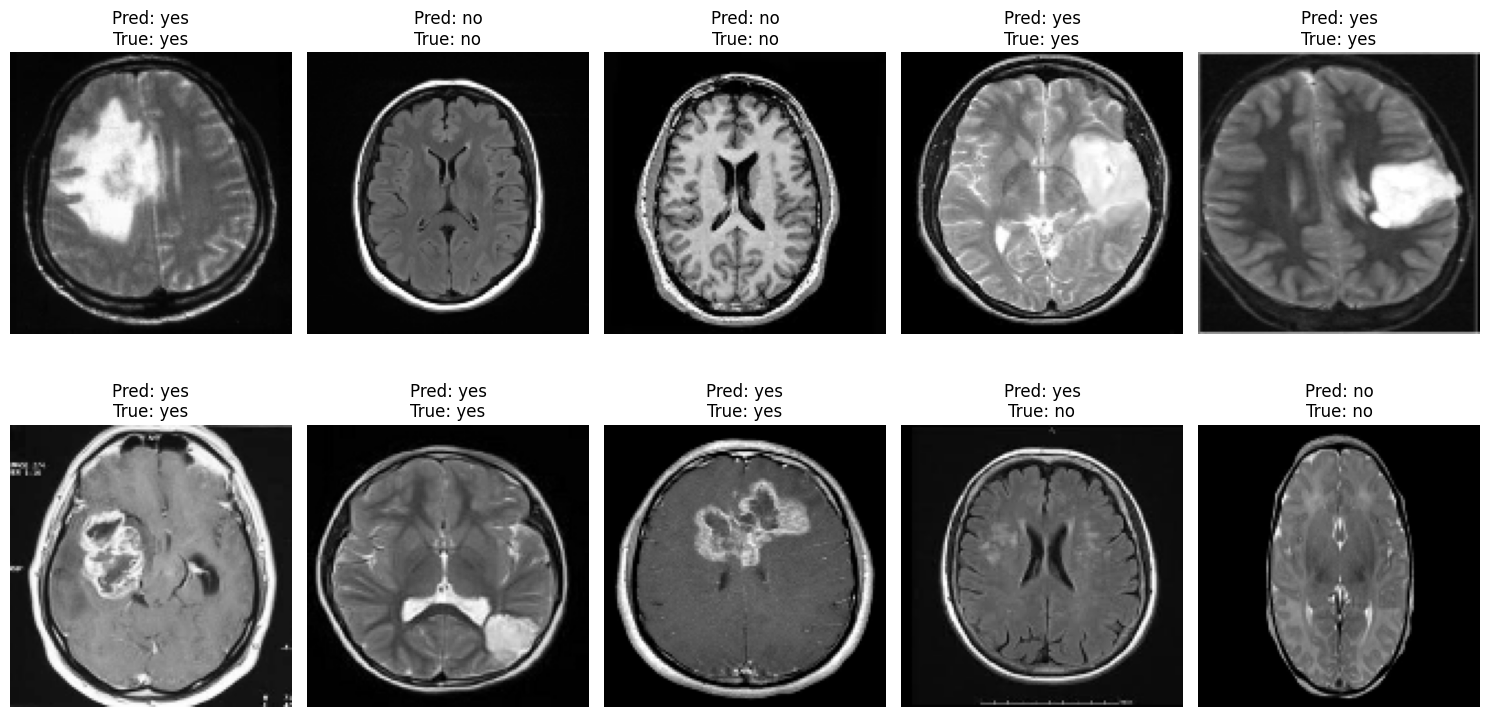

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i, ax in enumerate(axes.flat[:10]):
    ax.imshow(test_images[i], cmap='gray')
    predicted_class = np.argmax(predictions[i])
    true_class = test_labels[i]
    ax.set_title(f"Pred: {categories[predicted_class]}\nTrue: {categories[true_class]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
